<a href="https://colab.research.google.com/github/gopiprasanthpotipireddy/Quartic.ai-Challenge/blob/master/SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installing Python utilities

In [14]:
!apt-get --fix-broken install python-pycurl python-apt
!apt-get install -y -qq software-properties-common module-init-tools git-core
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null


Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  python-apt-dbg python-apt-doc libcurl4-gnutls-dev python-pycurl-dbg
  python-pycurl-doc
The following NEW packages will be installed:
  python-apt python-pycurl
0 upgraded, 2 newly installed, 0 to remove and 8 not upgraded.
Need to get 192 kB of archives.
After this operation, 860 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 python-apt amd64 1.6.3ubuntu1 [149 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pycurl amd64 7.43.0.1-0.2 [43.1 kB]
Fetched 192 kB in 0s (1,932 kB/s)
Selecting previously unselected package python-apt.
(Reading database ... 113598 files and directories currently installed.)
Preparing to unpack .../python-apt_1.6.3ubuntu1_amd64.deb ...
Unpacking python-apt (1.6.3ubuntu1) ...
Selecting previously unselected package python-pycurl.
Preparing to unpack .../python-pycurl_

installing and suthenticating drive

In [15]:
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 113635 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&acces

mounting drive

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

Quartic App Api

In [0]:
import os
import pandas as pd
from sklearn.metrics import average_precision_score,confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

class QuarticApp:
    def __init__(self):
        self.train_data = None
        self.test_data= None
        return
    
    def read_data(self):
        file_location="drive/Quartic.ai/ds_data/"
        self.train_data=pd.read_csv(os.path.join(file_location,"data_train.csv"))
        self.test_data=pd.read_csv(os.path.join(file_location,"data_test.csv"))
        #train_data.info()
        #test_data=pd.read_csv(os.path.join(file_location,"data_test.csv"))
        #test_data.info()
        return

    def build_model(self,model_type):
        #model
        return
    
    def ValidateColumns(self):    #checking for imputed and non imputed columns
        self.features=list(self.train_data.columns)
        self.im_features=[]
        self.nonim_columns=[]
        for i in range(1,len(self.train_data.columns)):
            if self.train_data.iloc[:,i].isna().sum() == 0:
                self.nonim_columns.append(self.features[i])
            else:
                self.im_features.append(self.features[i])
                    
        return 

def roc_binary(y_test,y_predict):
    
    fpr, tpr,_ = roc_curve(y_test, y_predict)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show() 

reading data

In [18]:
Obj=QuarticApp()
Obj.read_data()
train_data=Obj.train_data
train_data.columns
train_data.info()
test_data=Obj.test_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596000 entries, 0 to 595999
Data columns (total 58 columns):
id        596000 non-null int64
num1      596000 non-null int64
num2      596000 non-null int64
num3      596000 non-null int64
num4      596000 non-null int64
num5      596000 non-null int64
num6      596000 non-null int64
num7      596000 non-null int64
num8      596000 non-null int64
num9      596000 non-null int64
num10     596000 non-null int64
num11     596000 non-null int64
num12     596000 non-null int64
num13     596000 non-null int64
num14     596000 non-null int64
num15     596000 non-null int64
num16     596000 non-null float64
num17     596000 non-null float64
num18     488091 non-null float64
num19     595995 non-null float64
num20     595999 non-null float64
num21     596000 non-null float64
num22     553333 non-null float64
num23     596000 non-null float64
der1      596000 non-null float64
der2      596000 non-null float64
der3      596000 non-null float64
der

In [0]:
train_data=train_data.drop(['id'],axis=1)
test_data=test_data.drop(['id'],axis=1)


Validating for non imputable columns

In [0]:
Obj.ValidateColumns()

In [20]:
print (Obj.nonim_columns)
Obj.nonim_columns.remove('target')

['num1', 'num2', 'num3', 'num4', 'num5', 'num6', 'num7', 'num8', 'num9', 'num10', 'num11', 'num12', 'num13', 'num14', 'num15', 'num16', 'num17', 'num21', 'num23', 'der1', 'der2', 'der3', 'der4', 'der5', 'der6', 'der7', 'der8', 'der9', 'der10', 'der11', 'der12', 'der13', 'der14', 'der15', 'der16', 'der17', 'der18', 'der19', 'cat7', 'cat9', 'cat11', 'cat13', 'cat14', 'target']


x and y

In [0]:
x=train_data[Obj.nonim_columns]
y=train_data["target"]

installing imblearn package

In [0]:
!pip install -U git+https://github.com/scikit-learn-contrib/imbalanced-learn.git

  Cloning https://github.com/scikit-learn-contrib/imbalanced-learn.git to /tmp/pip-req-build-l2hcaes4
  Stored in directory: /tmp/pip-ephem-wheel-cache-tc7gjvvw/wheels/6c/07/cf/38cb9b7cc9e6a0ac7648a80ec192b6f2d863405fb0049ac0ff
Successfully built imbalanced-learn
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
from imblearn import over_sampling

In [0]:
from sklearn.svm import LinearSVC
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score,confusion_matrix,precision_recall_curve,f1_score
import numpy as np

# Preparing Augmented Data using SMOTE

In [0]:
#random oversampling
smote = SMOTE(random_state=2)

#x_resampled, y_resampled = ros.fit_resample(x, y)

# train test split and resampled data using SMOTE

In [0]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size=0.3, random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)


In [3]:
svc=LinearSVC()
parameters = {
    'C': np.linspace(1, 10, 10)    
             }
cl=GridSearchCV(svc,parameters,cv=10,verbose=5,n_jobs=3)

cl.fit(x_resampled,y_resampled)

NameError: ignored

In [0]:
import pickle

In [0]:
pickle.dump('drive/Quartic.ai/smote.sav','wb')

In [2]:
cl.cv_results_

NameError: ignored

# Prediction and Scores

In [0]:
y_pred=cl.predict(x_test)
f=confusion_matrix(y_test,y_pred)
print (average_precision_score(y_test,y_pred))
print (precision_recall_curve(y_test,y_pred))
print (f1_score(y_test,y_pred))

0.5064814651169637
(array([0.49986567, 0.50687424, 1.        ]), array([1.        , 0.94395744, 0.        ]), array([0, 1]))
0.6595771500003913


AttributeError: ignored

In [0]:
tn, fp, fn,tp=confusion_matrix(y_test,y_pred).ravel()

print (f)
print (tn)
print (fp)


[[ 33029 369078]
 [ 22523 379368]]
33029
369078


In [0]:
len(train_data)
tn+tp

412397

In [0]:
precision_recall_curve(y_test,y_pred)


(array([0.49986567, 0.50687424, 1.        ]),
 array([1.        , 0.94395744, 0.        ]),
 array([0, 1]))

In [0]:
average_precision_score(y_test,y_pred)


0.5064814651169637

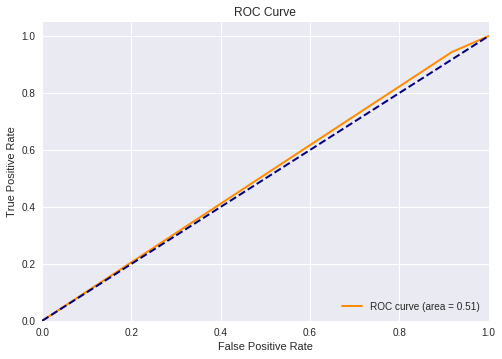

In [0]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
roc_auc_score(y_test,y_pred)
roc_binary`(y_test,y_pred)


In [0]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jun  7 22:58:00 2018

@author: gopiprasanth
"""

"""Impute missing values with k nearest classifier."""

import numpy as np
import pandas as pd
from sklearn import neighbors


class Imputer:
    """Imputer class."""

    def _fit(self, X, column, k=10, is_categorical=False):
        """Fit a knn classifier for missing column.
        - Args:
                X(numpy.ndarray): input data
                column(int): column id to be imputed
                k(int): number of nearest neighbors, default 10
                is_categorical(boolean): is continuous or categorical feature
        - Returns:
                clf: trained k nearest neighbour classifier
        """
        clf = None
        if not is_categorical:
            clf = neighbors.KNeighborsRegressor(n_neighbors=k)
        else:
            clf = neighbors.KNeighborsClassifier(n_neighbors=k)
        # use column not null to train the kNN classifier
        missing_idxes = np.where(pd.isnull(X[:, column]))[0]
        if len(missing_idxes) == 0:
            return None
        X_copy = np.delete(X, missing_idxes, 0)
        X_train = np.delete(X_copy, column, 1)
        # if other columns still have missing values fill with mean
        col_mean = None
        if not is_categorical:
            col_mean = np.nanmean(X, 0)
        else:
            col_mean = np.nanmedian(X, 0)
        for col_id in range(0, len(col_mean) - 1):
            col_missing_idxes = np.where(np.isnan(X_train[:, col_id]))[0]
            if len(col_missing_idxes) == 0:
                continue
            else:
                X_train[col_missing_idxes, col_id] = col_mean[col_id]
        y_train = X_copy[:, column]
        # fit classifier
        clf.fit(X_train, y_train)
        return clf

    def _transform(self, X, column, clf, is_categorical):
        """Impute missing values.
        - Args:
                X(numpy.ndarray): input numpy ndarray
                column(int): index of column to be imputed
                clf: pretrained classifier
                is_categorical(boolean): is continuous or categorical feature
        - Returns:
                X(pandas.dataframe): imputed dataframe
        """
        missing_idxes = np.where(np.isnan(X[:, column]))[0]
        X_test = X[missing_idxes, :]
        X_test = np.delete(X_test, column, 1)
        # if other columns still have missing values fill with mean
        col_mean = None
        if not is_categorical:
            col_mean = np.nanmean(X, 0)
        else:
            col_mean = np.nanmedian(X, 0)
        # fill missing values in each column with current col_mean
        for col_id in range(0, len(col_mean) - 1):
            col_missing_idxes = np.where(np.isnan(X_test[:, col_id]))[0]
            # if no missing values for current column
            if len(col_missing_idxes) == 0:
                continue
            else:
                X_test[col_missing_idxes, col_id] = col_mean[col_id]
        # predict missing values
        y_test = clf.predict(X_test)
        X[missing_idxes, column] = y_test
        return X

    def knn(self, X, column, k=10, is_categorical=False):
        """Impute missing value with knn.
        - Args:
                X(pandas.dataframe): dataframe
                column(str): column name to be imputed
                k(int): number of nearest neighbors, default 10
                is_categorical(boolean): is continuous or categorical feature
        - Returns:
                X_imputed(pandas.dataframe): imputed pandas dataframe
        """
        X, column = self._check_X_y(X, column)
        clf = self._fit(X, column, k, is_categorical)
        if clf is None:
            return X
        else:
            X_imputed = self._transform(X, column, clf, is_categorical)
            return X_imputed

    def _check_X_y(self, X, column):
        """Check input, if pandas.dataframe, transform to numpy array.
        - Args:
                X(ndarray/pandas.dataframe): input instances
                column(str/int): column index or column name
        - Returns:
                X(ndarray): input instances
        """
        column_idx = None
        if isinstance(X, pd.core.frame.DataFrame):
            if isinstance(column, str):
                # get index of current column
                column_idx = X.columns.get_loc(column)
            else:
                column_idx = column
            X = X.as_matrix()
        else:
            column_idx = column
        return X, column_idx
    



#random missing dataframe
        
df = pd.DataFrame({'A':[1,2,3,4],'B':[4,5,6,7],'C':[7,8,9,10]})
                   

print (df)


mask = np.random.choice([True, False], size=df.shape)
print (mask)


mask[mask.all(1),-1] = 0
print (mask)

print (df.mask(mask))
impute=Imputer()
impute.knn(df.mask(mask),1,k=2)
impute.knn(df.mask(mask),1,k=2)


   A  B   C
0  1  4   7
1  2  5   8
2  3  6   9
3  4  7  10
[[False False False]
 [False  True False]
 [False False  True]
 [ True False  True]]
[[False False False]
 [False  True False]
 [False False  True]
 [ True False  True]]
     A    B    C
0  1.0  4.0  7.0
1  2.0  NaN  8.0
2  3.0  6.0  NaN
3  NaN  7.0  NaN


array([[1. , 4. , 7. ],
       [2. , 5.5, 8. ],
       [3. , 6. , nan],
       [nan, 7. , nan]])